## Repeating the same process as the last two notebooks, this time for 2015 data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../guns2_clean.csv', index_col = 0)

In [4]:
df_2015 = df.loc['2015-01-01':'2015-12-31']

In [5]:
pd.options.mode.chained_assignment = None

In [7]:
df_2015['city'] = df_2015['city'] + ", " + df_2015['state']

In [8]:
df_2015.drop(['state'], axis=1, inplace=True)

In [10]:
cities_2015 = pd.DataFrame(df_2015.groupby(['city']).n_killed.sum().sort_values(ascending=False))

In [11]:
cities_2015.head()

,n_killed
city,
"Chicago, Illinois",432
"Houston, Texas",292
"Baltimore, Maryland",264
"New York, New York",261
"Saint Louis, Missouri",203


## Loading in Census Bureau csv:

In [18]:
pop = pd.read_csv('pop.csv', header=1, index_col='Rank')

In [19]:
pop['Geography.2'].replace('city.+', "", regex=True, inplace=True)

In [20]:
pop['Geography.1'].replace('^(.+?),', "", regex=True, inplace=True)

In [21]:
pop = pop[['Geography.2', 'Geography.1', 'Population Estimate (as of July 1) - 2015']]

In [22]:
pop.rename(columns= {'Geography.2':'city', 'Geography.1':'state', 'Population Estimate (as of July 1) - 2015':'2015_pop' }, inplace=True)

In [23]:
pop['city'] = pop['city'].str.strip()

In [24]:
pop['state'] = pop['state'].str.strip()

In [25]:
pop['city'] = pop['city'] + ", " + pop['state']

In [26]:
pop.set_index(['city'], inplace=True)

In [27]:
pop.drop('state', axis= 1, inplace=True)

In [28]:
pop.head()

,2015_pop
city,
"New York, New York",8582459
"Los Angeles, California",3953459
"Chicago, Illinois",2725154
"Houston, Texas",2282235
"Phoenix, Arizona",1575039


## Merging population and gun death dataframes:

In [29]:
cities_2015 = pd.merge(pop, cities_2015, left_index=True, right_index=True)

In [30]:
cities_2015['pc_killed'] = (cities_2015.n_killed / cities_2015['2015_pop']) * 100000

In [31]:
top_cities_2015 = cities_2015.sort_values('pc_killed', ascending=False).head(20)
top_cities_2015

,2015_pop,n_killed,pc_killed
city,,,
"Gary, Indiana",77267,45,58.239611
"Flint, Michigan",97738,48,49.110888
"New Orleans, Louisiana",390711,174,44.534195
"Baltimore, Maryland",623031,264,42.373493
"Camden, New Jersey",75826,31,40.883074
"Birmingham, Alabama",211621,82,38.748517
"Wilmington, Delaware",71372,26,36.428852
"Baton Rouge, Louisiana",227864,82,35.986378
"Savannah, Georgia",145652,51,35.014967


In [32]:
top_large_cities_2015 = cities_2015[cities_2015['2015_pop']>=500000].sort_values('pc_killed', ascending=False).head(20)
top_large_cities_2015

,2015_pop,n_killed,pc_killed
city,,,
"Baltimore, Maryland",623031,264,42.373493
"Milwaukee, Wisconsin",601012,131,21.796570
"Las Vegas, Nevada",621481,132,21.239587
"Memphis, Tennessee",654753,124,18.938439
"Detroit, Michigan",678250,126,18.577221
"Washington, District of Columbia",672736,122,18.134900
"Indianapolis, Indiana",854051,139,16.275375
"Chicago, Illinois",2725154,432,15.852315
"Houston, Texas",2282235,292,12.794476


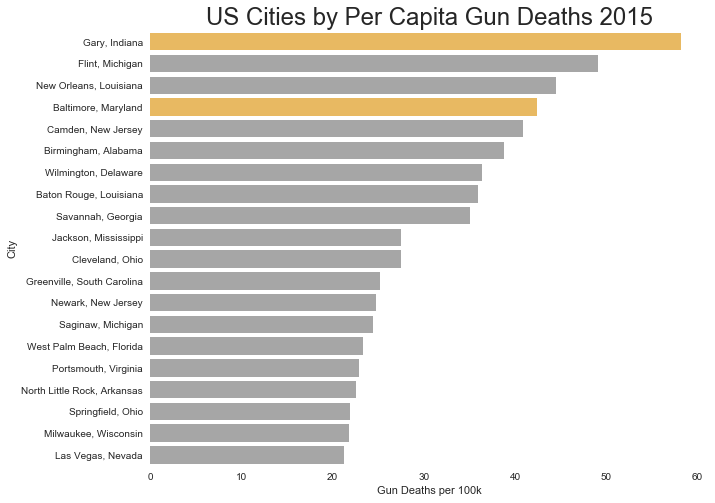

In [33]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
colors = ['orange' if (x=='Baltimore, Maryland' or x == 'Gary, Indiana') else 'grey' for x in top_cities_2015.index]
sns.barplot(x=top_cities_2015.pc_killed, 
            y=top_cities_2015.index,
            data=top_cities_2015, palette=colors, alpha=.7)
sns.set(font_scale=2)
ax.set(xlabel="Gun Deaths per 100k",
       ylabel="City",
       title="US Cities by Per Capita Gun Deaths 2015")
sns.despine(left=True, bottom=True)

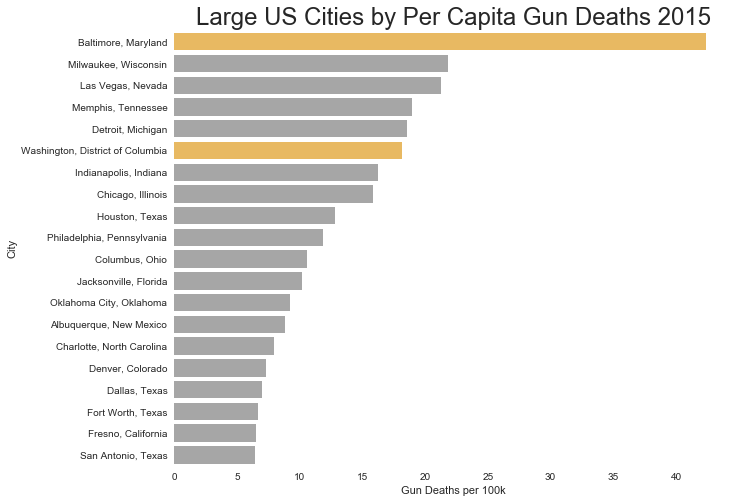

In [34]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
colors = ['orange' if (x=='Baltimore, Maryland' or x == 'Washington, District of Columbia') else 'grey' for x in top_large_cities_2015.index]
sns.barplot(x=top_large_cities_2015.pc_killed, 
            y=top_large_cities_2015.index,
            data=top_large_cities_2015, palette=colors, alpha=.7)
sns.set(font_scale=2)
ax.set(xlabel="Gun Deaths per 100k",
       ylabel="City",
       title="Large US Cities by Per Capita Gun Deaths 2015")
sns.despine(left=True, bottom=True)